# Genre Dataframe - Original

## Now trying KNN


In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [ ]:
df = pd.read_csv(os.path.join("spotify_df.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,jason mraz,i'm yours,1EzrEOXmMH3G43AXT1y7pA,https://open.spotify.com/artist/4phGZZrJZRo4El...,https://open.spotify.com/track/1EzrEOXmMH3G43A...,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,chord overstreet,hold on,5vjLSffimiIP26QG5WcN2K,https://open.spotify.com/artist/5D3muNJhYYunbR...,https://open.spotify.com/track/5vjLSffimiIP26Q...,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,matt nathanson,come on get higher,38YgZVHPWOWsKrsCXz6JyP,https://open.spotify.com/artist/4NGiEU3Pkd8ASR...,https://open.spotify.com/track/38YgZVHPWOWsKrs...,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,sara bareilles,love song,4E6cwWJWZw2zWf7VFbH7wf,https://open.spotify.com/artist/2Sqr0DXoaYABbj...,https://open.spotify.com/track/4E6cwWJWZw2zWf7...,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,jason mraz,i won't give up,53QF56cjZA9RTuuMZDrSA6,https://open.spotify.com/artist/4phGZZrJZRo4El...,https://open.spotify.com/track/53QF56cjZA9RTuu...,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
y = ML_df["genre_name"]

In [ ]:
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.686,0.457,11,-8.322,1,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,0.585,0.303,4,-10.058,1,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Baseline Accuracy

In [ ]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [ ]:
y_pred = dummy_clf.predict(X_test)
print(y_pred)

['synth-pop' 'folk' 'comedy' ... 'spanish' 'drum-and-bass' 'afrobeat']


In [ ]:
dummy_score = dummy_clf.score(X_test, y_test)
print(dummy_score)

0.010833217221680368


k: 1, Train/Test Score: 1.000/0.108, 1.107
k: 3, Train/Test Score: 0.421/0.099, 0.520
k: 5, Train/Test Score: 0.329/0.105, 0.434
k: 7, Train/Test Score: 0.291/0.110, 0.401
k: 9, Train/Test Score: 0.269/0.114, 0.383
k: 11, Train/Test Score: 0.255/0.115, 0.370
k: 13, Train/Test Score: 0.243/0.116, 0.358
k: 15, Train/Test Score: 0.232/0.115, 0.347
k: 17, Train/Test Score: 0.223/0.115, 0.338
k: 19, Train/Test Score: 0.217/0.114, 0.331


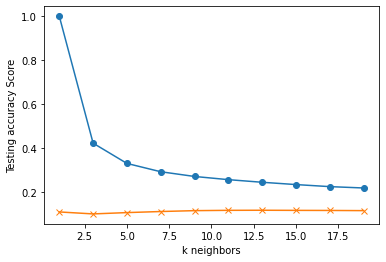

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Now trying SGD - Classifier

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [ ]:
X = ML_df["genre_name"]

In [ ]:
y = ML_df.drop("genre_name", axis=1)

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Always scale the input. The most convenient way is to use a pipeline.
# clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
# clf.fit(X, y)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('sgdclassifier', SGDClassifier())])
# print(clf.predict([[-0.8, -1]]))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
by_genre = df.groupby("genre_name")["track_name"].count()
by_genre = pd.DataFrame(by_genre)
by_genre

,track_name
genre_name,
acoustic,1424
afrobeat,1448
alt-rock,1427
alternative,602
ambient,1423
...,...
techno,586
trance,782
trip-hop,1106


In [ ]:
# Assign the data to X and y								
# X = df[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]
# y = df["genre"].values.reshape(-1, 1)
# print(X.shape, y.shape)

## Now trying Several Linear Models

In [ ]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
genre = pd.get_dummies(ML_df)
genre.head()
### END SOLUTION

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_name_acoustic,genre_name_afrobeat,genre_name_alt-rock,genre_name_ambient,genre_name_anime,genre_name_black-metal,genre_name_bluegrass,genre_name_chicago-house,genre_name_chill,genre_name_comedy,genre_name_dancehall,genre_name_deep-house,genre_name_emo,genre_name_forro,genre_name_grindcore,genre_name_heavy-metal,genre_name_idm,genre_name_indian,genre_name_malay,genre_name_turkish
0,0.755,0.599,8,-5.042,1,0.2240,0.147,0.000000,0.109,0.755,133.123,216632,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.927,0.367,9,-7.797,1,0.3820,0.325,0.000000,0.132,0.576,99.053,328667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.831,0.514,7,-6.695,1,0.0368,0.203,0.000156,0.115,0.397,114.940,244340,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.858,0.697,2,-5.361,1,0.2300,0.114,0.000000,0.224,0.364,98.012,290836,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.685,0.621,11,-8.442,0,0.3610,0.433,0.000000,0.607,0.538,128.906,353960,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = genre[["danceability"]]
y = y = genre["genre_name_dance"].values.reshape(-1, 1)
print(X.shape, y.shape)

KeyError: ignored

In [ ]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [ ]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression

models = []

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.9326425534807025, R2: 0.0035547422324515576


In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.9369062364507903, R2: 0.0037003917017792705


In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Ridge",
            "MSE": MSE,
            "R2":r2})

MSE: 0.9370432029813619, R2: 0.0035547424409999584


In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.936945462213467, R2: 0.0036586792971975424


In [ ]:
a = pd.DataFrame(models)
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
1,Lasso,0.936906,0.0037


In [ ]:
a

,model,MSE,R2
0,LinearRegression,1.021679,0.008130
1,Lasso,0.933261,0.007577
2,Ridge,0.932740,0.008130
3,ElasticNet,0.932643,0.008234


## Now trying Logistic Regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
ML_df

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.59500,0.000000,0.1050,0.718,150.953,242187
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.24100,0.000000,0.0848,0.617,92.018,215173
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.02080,0.000000,0.1880,0.573,123.052,258827
4,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.69400,0.000000,0.1150,0.142,136.703,240166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114826,world-music,0.669,0.729,6,-5.236,1,0.0347,0.01390,0.000000,0.0990,0.400,128.983,232680
114827,world-music,0.428,0.493,7,-7.387,1,0.0287,0.17000,0.000000,0.2540,0.220,76.854,313387
114828,world-music,0.442,0.388,2,-10.186,1,0.0286,0.68300,0.000010,0.1390,0.215,101.990,379348
114829,world-music,0.402,0.856,11,-6.410,1,0.0414,0.00119,0.000005,0.0892,0.155,156.008,382027


In [ ]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(114831, 12) (114831,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train

76625           latin
104413          sleep
39722         electro
59311       hardstyle
46659            funk
             ...     
68424         iranian
37364             dub
42926            folk
85597           opera
29393     death-metal
Name: genre_name, Length: 86123, dtype: object

In [ ]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.023083264633140973
Testing Data Score: 0.02386094468440853


In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['black-metal' 'drum-and-bass' 'happy' 'forro' 'happy' 'drum-and-bass'
 'happy' 'forro' 'drum-and-bass' 'forro']
First 10 Actual labels: ['hardcore', 'gospel', 'happy', 'rock-n-roll', 'hardcore', 'spanish', 'comedy', 'club', 'garage', 'comedy']


In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,black-metal,hardcore
1,drum-and-bass,gospel
2,happy,happy
3,forro,rock-n-roll
4,happy,hardcore
...,...,...
28703,drum-and-bass,electronic
28704,black-metal,hardcore
28705,happy,goth
28706,idm,dancehall


## Now trying with Neural Network Deep Learning


In [ ]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(114831, 12) (114831,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=111, activation='relu', input_dim=12))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 111)               1443      
_________________________________________________________________
dense_6 (Dense)              (None, 111)               12432     
_________________________________________________________________
dense_7 (Dense)              (None, 111)               12432     
_________________________________________________________________
dense_8 (Dense)              (None, 111)               12432     
Total params: 38,739
Trainable params: 38,739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
2692/2692 - 4s - loss: 2.8401 - accuracy: 0.2816
Epoch 2/10
2692/2692 - 4s - loss: 2.8357 - accuracy: 0.2827
Epoch 3/10
2692/2692 - 4s - loss: 2.8327 - accuracy: 0.2832
Epoch 4/10
2692/2692 - 4s - loss: 2.8276 - accuracy: 0.2830
Epoch 5/10
2692/2692 - 4s - loss: 2.8233 - accuracy: 0.2851
Epoch 6/10
2692/2692 - 4s - loss: 2.8196 - accuracy: 0.2860
Epoch 7/10
2692/2692 - 5s - loss: 2.8159 - accuracy: 0.2844
Epoch 8/10
2692/2692 - 5s - loss: 2.8128 - accuracy: 0.2880
Epoch 9/10
2692/2692 - 4s - loss: 2.8098 - accuracy: 0.2873
Epoch 10/10
2692/2692 - 4s - loss: 2.8051 - accuracy: 0.2865


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

898/898 - 1s - loss: 3.0079 - accuracy: 0.2631
Normal Neural Network - Loss: 3.007857084274292, Accuracy: 0.26306256651878357


In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=111, activation='relu', input_dim=12))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
model.add(Dense(units=111, activation='relu'))
# model.add(Dense(units=111, activation='relu'))
# model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='softmax'))
model.add(Dense(units=111, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 111)               1443      
_________________________________________________________________
dense_103 (Dense)            (None, 111)               12432     
_________________________________________________________________
dense_104 (Dense)            (None, 111)               12432     
_________________________________________________________________
dense_105 (Dense)            (None, 111)               12432     
Total params: 38,739
Trainable params: 38,739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
2692/2692 - 5s - loss: 3.8083 - accuracy: 0.1086
Epoch 2/10
2692/2692 - 5s - loss: 3.4794 - accuracy: 0.1552
Epoch 3/10
2692/2692 - 5s - loss: 3.4002 - accuracy: 0.1696
Epoch 4/10
2692/2692 - 5s - loss: 3.3448 - accuracy: 0.1817
Epoch 5/10
2692/2692 - 5s - loss: 3.3002 - accuracy: 0.1895
Epoch 6/10
2692/2692 - 5s - loss: 3.2599 - accuracy: 0.1982
Epoch 7/10
2692/2692 - 5s - loss: 3.2228 - accuracy: 0.2045
Epoch 8/10
2692/2692 - 5s - loss: 3.1887 - accuracy: 0.2128
Epoch 9/10
2692/2692 - 7s - loss: 3.1549 - accuracy: 0.2199
Epoch 10/10
2692/2692 - 7s - loss: 3.1269 - accuracy: 0.2262


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

898/898 - 1s - loss: 3.1718 - accuracy: 0.2196
Normal Neural Network - Loss: 3.171797513961792, Accuracy: 0.21959035098552704


In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['pagode' 'minimal-techno' 'rock-n-roll' 'guitar' 'indian']
Actual Labels: ['rock-n-roll', 'minimal-techno', 'rock-n-roll', 'dub', 'forro']


## Now trying it with less features

In [ ]:
ML_df

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.59500,0.000000,0.1050,0.718,150.953,242187
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,198853
2,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.24100,0.000000,0.0848,0.617,92.018,215173
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.02080,0.000000,0.1880,0.573,123.052,258827
4,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.69400,0.000000,0.1150,0.142,136.703,240166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114826,world-music,0.669,0.729,6,-5.236,1,0.0347,0.01390,0.000000,0.0990,0.400,128.983,232680
114827,world-music,0.428,0.493,7,-7.387,1,0.0287,0.17000,0.000000,0.2540,0.220,76.854,313387
114828,world-music,0.442,0.388,2,-10.186,1,0.0286,0.68300,0.000010,0.1390,0.215,101.990,379348
114829,world-music,0.402,0.856,11,-6.410,1,0.0414,0.00119,0.000005,0.0892,0.155,156.008,382027


In [ ]:
ML_df_2 = ML_df.drop(['mode'], axis=1)
ML_df_2.head()

,genre_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.686,0.457,11,-8.322,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,acoustic,0.618,0.443,2,-9.681,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,acoustic,0.672,0.623,9,-5.699,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,acoustic,0.583,0.786,2,-3.142,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,acoustic,0.585,0.303,4,-10.058,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
# Assign X (data) and y (target)
X = ML_df_2.drop("genre_name", axis=1)
y = ML_df_2["genre_name"]
print(X.shape, y.shape)

(114831, 11) (114831,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=111, activation='relu', input_dim=11))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
# model.add(Dense(units=111, activation='sigmoid'))
model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='relu'))
model.add(Dense(units=111, activation='relu'))
# model.add(Dense(units=111, activation='softmax'))
model.add(Dense(units=111, activation='softplus'))
# model.add(Dense(units=111, activation='softsign'))


In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 111)               1332      
_________________________________________________________________
dense_149 (Dense)            (None, 111)               12432     
_________________________________________________________________
dense_150 (Dense)            (None, 111)               12432     
_________________________________________________________________
dense_151 (Dense)            (None, 111)               12432     
_________________________________________________________________
dense_152 (Dense)            (None, 111)               12432     
Total params: 51,060
Trainable params: 51,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
2692/2692 - 6s - loss: 3.0092 - accuracy: 0.2479
Epoch 2/100
2692/2692 - 6s - loss: 2.9912 - accuracy: 0.2512
Epoch 3/100
2692/2692 - 6s - loss: 2.9734 - accuracy: 0.2545
Epoch 4/100
2692/2692 - 6s - loss: 2.9595 - accuracy: 0.2574
Epoch 5/100
2692/2692 - 6s - loss: 2.9485 - accuracy: 0.2591
Epoch 6/100
2692/2692 - 6s - loss: 2.9384 - accuracy: 0.2595
Epoch 7/100
2692/2692 - 6s - loss: 2.9237 - accuracy: 0.2642
Epoch 8/100
2692/2692 - 6s - loss: 2.9150 - accuracy: 0.2649
Epoch 9/100
2692/2692 - 6s - loss: 2.9083 - accuracy: 0.2679
Epoch 10/100
2692/2692 - 6s - loss: 2.8975 - accuracy: 0.2682
Epoch 11/100
2692/2692 - 6s - loss: 2.8881 - accuracy: 0.2706
Epoch 12/100
2692/2692 - 6s - loss: 2.8821 - accuracy: 0.2704
Epoch 13/100
2692/2692 - 6s - loss: 2.8730 - accuracy: 0.2725
Epoch 14/100
2692/2692 - 6s - loss: 2.8676 - accuracy: 0.2748
Epoch 15/100
2692/2692 - 6s - loss: 2.8583 - accuracy: 0.2755
Epoch 16/100
2692/2692 - 6s - loss: 2.8543 - accuracy: 0.2758
Epoch 17/100
2692

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

898/898 - 1s - loss: 3.0647 - accuracy: 0.2429
Normal Neural Network - Loss: 3.064708948135376, Accuracy: 0.24292880296707153


# Genre Dataframe Changed - Top 50 Genres

In [ ]:
df = pd.read_csv(os.path.join("spotify_df_2.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,lil dicky,freaky friday (feat. chris brown),10Igtw8bSDyyFs7KIsKngZ,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/10Igtw8bSDyyFs7...,comedy,0.755,0.599,8,-5.042,1,0.2240,0.147,0.000000,0.109,0.755,133.123,216632
1,afroman,crazy rap (colt 45 & 2 zig zags),1ACZpHI5vZ5Ea4xGlkdGWM,https://open.spotify.com/artist/4Icvbp9RDt5aY2...,https://open.spotify.com/track/1ACZpHI5vZ5Ea4x...,comedy,0.927,0.367,9,-7.797,1,0.3820,0.325,0.000000,0.132,0.576,99.053,328667
2,lil dicky,molly (feat. brendon urie of panic at the disco),0NBiC3zLXoBQXBjsbnbwJq,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/0NBiC3zLXoBQXBj...,comedy,0.831,0.514,7,-6.695,1,0.0368,0.203,0.000156,0.115,0.397,114.940,244340
3,lil dicky,$ave dat money (feat. fetty wap & rich homie q...,6AoYWCzsDls6c61Zp5qTuU,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/6AoYWCzsDls6c61...,comedy,0.858,0.697,2,-5.361,1,0.2300,0.114,0.000000,0.224,0.364,98.012,290836
4,lil dicky,professional rapper (feat. snoop dogg),1Ysc1uDZtf430TGavoS1j4,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/1Ysc1uDZtf430TG...,comedy,0.685,0.621,11,-8.442,0,0.3610,0.433,0.000000,0.607,0.538,128.906,353960


In [ ]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89640 entries, 0 to 89639
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        89640 non-null  object 
 1   danceability      89640 non-null  float64
 2   energy            89640 non-null  float64
 3   key               89640 non-null  int64  
 4   loudness          89640 non-null  float64
 5   mode              89640 non-null  int64  
 6   speechiness       89640 non-null  float64
 7   acousticness      89640 non-null  float64
 8   instrumentalness  89640 non-null  float64
 9   liveness          89640 non-null  float64
 10  valence           89640 non-null  float64
 11  tempo             89640 non-null  float64
 12  duration_ms       89640 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 8.9+ MB


In [ ]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(89640, 12) (89640,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=12))
# model.add(Dense(units=50, activation='sigmoid'))
# model.add(Dense(units=50, activation='sigmoid'))
# model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_221 (Dense)            (None, 50)                650       
_________________________________________________________________
dense_222 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_223 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_224 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_225 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_226 (Dense)            (None, 50)                2550      
Total params: 13,400
Trainable params: 13,400
Non-trainable params: 0
_________________________________________________

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
2101/2101 - 3s - loss: 2.9766 - accuracy: 0.1734
Epoch 2/200
2101/2101 - 3s - loss: 2.7482 - accuracy: 0.2187
Epoch 3/200
2101/2101 - 3s - loss: 2.6701 - accuracy: 0.2413
Epoch 4/200
2101/2101 - 3s - loss: 2.6084 - accuracy: 0.2592
Epoch 5/200
2101/2101 - 3s - loss: 2.5560 - accuracy: 0.2746
Epoch 6/200
2101/2101 - 3s - loss: 2.5172 - accuracy: 0.2839
Epoch 7/200
2101/2101 - 3s - loss: 2.4835 - accuracy: 0.2935
Epoch 8/200
2101/2101 - 3s - loss: 2.4520 - accuracy: 0.2997
Epoch 9/200
2101/2101 - 3s - loss: 2.4233 - accuracy: 0.3095
Epoch 10/200
2101/2101 - 3s - loss: 2.3993 - accuracy: 0.3161
Epoch 11/200
2101/2101 - 3s - loss: 2.3830 - accuracy: 0.3181
Epoch 12/200
2101/2101 - 3s - loss: 2.3624 - accuracy: 0.3217
Epoch 13/200
2101/2101 - 3s - loss: 2.3520 - accuracy: 0.3283
Epoch 14/200
2101/2101 - 3s - loss: 2.3389 - accuracy: 0.3304
Epoch 15/200
2101/2101 - 3s - loss: 2.3260 - accuracy: 0.3320
Epoch 16/200
2101/2101 - 3s - loss: 2.3169 - accuracy: 0.3347
Epoch 17/200
2101

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

701/701 - 1s - loss: 2.2628 - accuracy: 0.3678
Normal Neural Network - Loss: 2.2627718448638916, Accuracy: 0.36778223514556885


## Now trying KNN

## Now trying it with less features

In [ ]:
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,comedy,0.755,0.599,8,-5.042,1,0.2240,0.147,0.000000,0.109,0.755,133.123,216632
1,comedy,0.927,0.367,9,-7.797,1,0.3820,0.325,0.000000,0.132,0.576,99.053,328667
2,comedy,0.831,0.514,7,-6.695,1,0.0368,0.203,0.000156,0.115,0.397,114.940,244340
3,comedy,0.858,0.697,2,-5.361,1,0.2300,0.114,0.000000,0.224,0.364,98.012,290836
4,comedy,0.685,0.621,11,-8.442,0,0.3610,0.433,0.000000,0.607,0.538,128.906,353960


In [ ]:
# ['danceability',
#                             'energy',
#                             'key',
#                             'loudness',
#                             'mode', 
#                             'speechiness', 
#                             'acousticness', 
#                             'instrumentalness', 
#                             'liveness', 
#                             'valence', 
#                             'tempo', 
#                             'duration_ms'],

dropped_ML_df = ML_df.drop(['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo'],
                           axis=1)

# dropped_ML_df()
# print(dropped_ML_df)
dropped_ML_df.iloc[30000:30005]

,genre_name,duration_ms
30000,forro,200295
30001,forro,219193
30002,forro,281533
30003,forro,267925
30004,forro,251912


In [ ]:
X = dropped_ML_df.drop("genre_name", axis=1)
y = dropped_ML_df["genre_name"]
print(X.shape, y.shape)

(89640, 1) (89640,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim =1))
# model.add(Dense(units=50, activation='sigmoid'))
# model.add(Dense(units=50, activation='sigmoid'))
# model.add(Dense(units=50, activation='sigmoid'))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
2101/2101 - 2s - loss: 3.8962 - accuracy: 0.0293
Epoch 2/10
2101/2101 - 2s - loss: 3.8419 - accuracy: 0.0408
Epoch 3/10
2101/2101 - 2s - loss: 3.8122 - accuracy: 0.0386
Epoch 4/10
2101/2101 - 2s - loss: 3.8022 - accuracy: 0.0412
Epoch 5/10
2101/2101 - 2s - loss: 3.7978 - accuracy: 0.0404
Epoch 6/10
2101/2101 - 2s - loss: 3.7952 - accuracy: 0.0408
Epoch 7/10
2101/2101 - 2s - loss: 3.7926 - accuracy: 0.0414
Epoch 8/10
2101/2101 - 2s - loss: 3.7902 - accuracy: 0.0450
Epoch 9/10
2101/2101 - 2s - loss: 3.7877 - accuracy: 0.0447
Epoch 10/10
2101/2101 - 2s - loss: 3.7849 - accuracy: 0.0447


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# Genre Dataframe Changed - Top 20 Genres

In [ ]:
df = pd.read_csv(os.path.join("spotify_df_3.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,lil dicky,freaky friday (feat. chris brown),10Igtw8bSDyyFs7KIsKngZ,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/10Igtw8bSDyyFs7...,comedy,0.755,0.599,8,-5.042,1,0.2240,0.147,0.000000,0.109,0.755,133.123,216632
1,afroman,crazy rap (colt 45 & 2 zig zags),1ACZpHI5vZ5Ea4xGlkdGWM,https://open.spotify.com/artist/4Icvbp9RDt5aY2...,https://open.spotify.com/track/1ACZpHI5vZ5Ea4x...,comedy,0.927,0.367,9,-7.797,1,0.3820,0.325,0.000000,0.132,0.576,99.053,328667
2,lil dicky,molly (feat. brendon urie of panic at the disco),0NBiC3zLXoBQXBjsbnbwJq,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/0NBiC3zLXoBQXBj...,comedy,0.831,0.514,7,-6.695,1,0.0368,0.203,0.000156,0.115,0.397,114.940,244340
3,lil dicky,$ave dat money (feat. fetty wap & rich homie q...,6AoYWCzsDls6c61Zp5qTuU,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/6AoYWCzsDls6c61...,comedy,0.858,0.697,2,-5.361,1,0.2300,0.114,0.000000,0.224,0.364,98.012,290836
4,lil dicky,professional rapper (feat. snoop dogg),1Ysc1uDZtf430TGavoS1j4,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/1Ysc1uDZtf430TG...,comedy,0.685,0.621,11,-8.442,0,0.3610,0.433,0.000000,0.607,0.538,128.906,353960


In [ ]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37955 entries, 0 to 37954
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        37955 non-null  object 
 1   danceability      37955 non-null  float64
 2   energy            37955 non-null  float64
 3   key               37955 non-null  int64  
 4   loudness          37955 non-null  float64
 5   mode              37955 non-null  int64  
 6   speechiness       37955 non-null  float64
 7   acousticness      37955 non-null  float64
 8   instrumentalness  37955 non-null  float64
 9   liveness          37955 non-null  float64
 10  valence           37955 non-null  float64
 11  tempo             37955 non-null  float64
 12  duration_ms       37955 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 3.8+ MB


In [ ]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(37955, 12) (37955,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=12))
# model.add(Dense(units=20, activation='sigmoid'))
# model.add(Dense(units=20, activation='sigmoid'))
# model.add(Dense(units=20, activation='sigmoid'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
# model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 20)                260       
_________________________________________________________________
dense_216 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_217 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_218 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_219 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_220 (Dense)            (None, 20)                420       
Total params: 2,360
Trainable params: 2,360
Non-trainable params: 0
___________________________________________________

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
890/890 - 1s - loss: 1.6937 - accuracy: 0.4415
Epoch 2/10
890/890 - 1s - loss: 1.6843 - accuracy: 0.4441
Epoch 3/10
890/890 - 1s - loss: 1.6725 - accuracy: 0.4513
Epoch 4/10
890/890 - 1s - loss: 1.6643 - accuracy: 0.4515
Epoch 5/10
890/890 - 1s - loss: 1.6593 - accuracy: 0.4551
Epoch 6/10
890/890 - 1s - loss: 1.6534 - accuracy: 0.4554
Epoch 7/10
890/890 - 1s - loss: 1.6479 - accuracy: 0.4564
Epoch 8/10
890/890 - 1s - loss: 1.6442 - accuracy: 0.4585
Epoch 9/10
890/890 - 1s - loss: 1.6396 - accuracy: 0.4581
Epoch 10/10
890/890 - 1s - loss: 1.6346 - accuracy: 0.4643


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

### Now trying with KNN

In [ ]:
df = pd.read_csv(os.path.join("spotify_df_3.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,jason mraz,i'm yours,1EzrEOXmMH3G43AXT1y7pA,https://open.spotify.com/artist/4phGZZrJZRo4El...,https://open.spotify.com/track/1EzrEOXmMH3G43A...,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,chord overstreet,hold on,5vjLSffimiIP26QG5WcN2K,https://open.spotify.com/artist/5D3muNJhYYunbR...,https://open.spotify.com/track/5vjLSffimiIP26Q...,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,matt nathanson,come on get higher,38YgZVHPWOWsKrsCXz6JyP,https://open.spotify.com/artist/4NGiEU3Pkd8ASR...,https://open.spotify.com/track/38YgZVHPWOWsKrs...,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,sara bareilles,love song,4E6cwWJWZw2zWf7VFbH7wf,https://open.spotify.com/artist/2Sqr0DXoaYABbj...,https://open.spotify.com/track/4E6cwWJWZw2zWf7...,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,jason mraz,i won't give up,53QF56cjZA9RTuuMZDrSA6,https://open.spotify.com/artist/4phGZZrJZRo4El...,https://open.spotify.com/track/53QF56cjZA9RTuu...,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,acoustic,0.686,0.457,11,-8.322,1,0.0468,0.5950,0.0,0.1050,0.718,150.953,242187
1,acoustic,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.0,0.0829,0.167,119.949,198853
2,acoustic,0.672,0.623,9,-5.699,1,0.0297,0.2410,0.0,0.0848,0.617,92.018,215173
3,acoustic,0.583,0.786,2,-3.142,0,0.0301,0.0208,0.0,0.1880,0.573,123.052,258827
4,acoustic,0.585,0.303,4,-10.058,1,0.0398,0.6940,0.0,0.1150,0.142,136.703,240166


In [ ]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.755,0.599,8,-5.042,1,0.2240,0.147,0.000000,0.109,0.755,133.123,216632
1,0.927,0.367,9,-7.797,1,0.3820,0.325,0.000000,0.132,0.576,99.053,328667
2,0.831,0.514,7,-6.695,1,0.0368,0.203,0.000156,0.115,0.397,114.940,244340
3,0.858,0.697,2,-5.361,1,0.2300,0.114,0.000000,0.224,0.364,98.012,290836
4,0.685,0.621,11,-8.442,0,0.3610,0.433,0.000000,0.607,0.538,128.906,353960


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

k: 1, Train/Test Score: 1.000/0.108, 1.108
k: 3, Train/Test Score: 0.429/0.090, 0.520
k: 5, Train/Test Score: 0.342/0.096, 0.438
k: 7, Train/Test Score: 0.304/0.100, 0.404
k: 9, Train/Test Score: 0.276/0.105, 0.382
k: 11, Train/Test Score: 0.258/0.105, 0.363
k: 13, Train/Test Score: 0.241/0.105, 0.346
k: 15, Train/Test Score: 0.230/0.105, 0.335
k: 17, Train/Test Score: 0.221/0.106, 0.327
k: 19, Train/Test Score: 0.213/0.107, 0.320


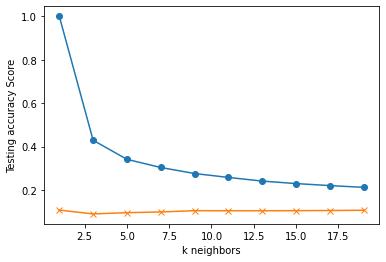

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Feature Selection Analysis


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sn

from scipy.stats import linregress

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


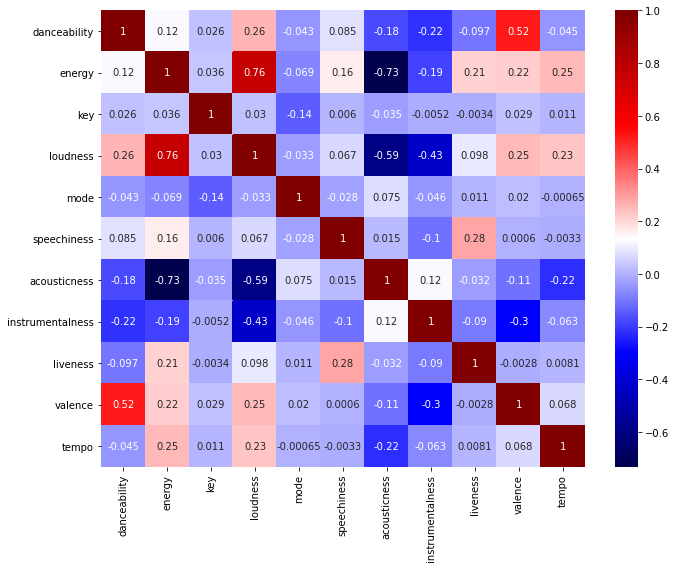

In [ ]:
all_features = pd.DataFrame(ML_df, columns=['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo'],)
corrMatrix = all_features.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
fig_name = "all_features"
plt.tight_layout()
plt.show()

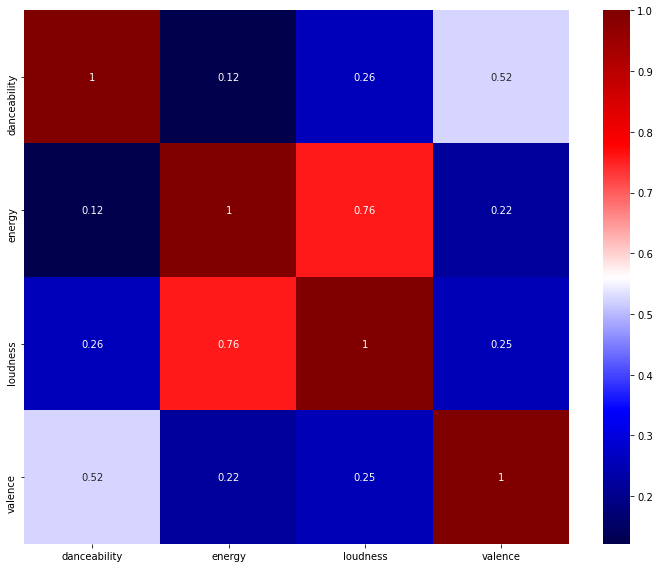

In [ ]:
features_set_1 = pd.DataFrame(ML_df, columns=['danceability',
                            'energy',
                            'loudness', 
                            'valence', 
                            ],)
corrMatrix = features_set_1.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
plt.tight_layout()
plt.show()

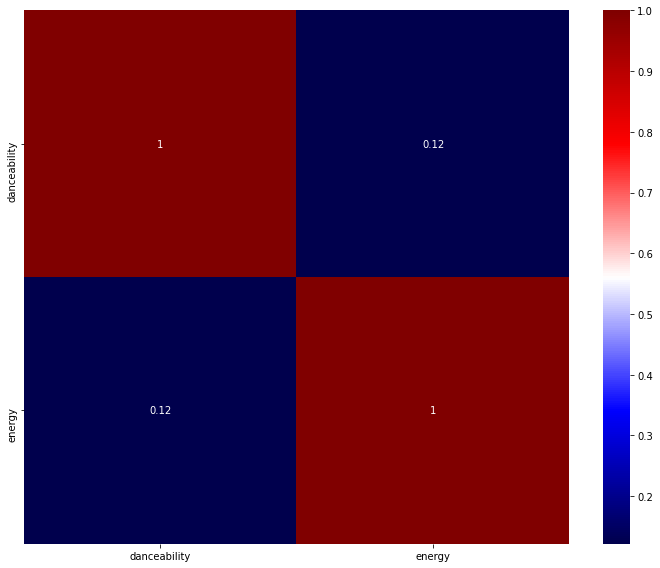

In [ ]:
features_set_2 = pd.DataFrame(ML_df, columns=['danceability',
                            'energy'
                            ],)
corrMatrix = features_set_2.corr()
plt.figure(figsize=(10,8))
sn.heatmap(corrMatrix, cmap='seismic', annot=True)
plt.tight_layout()
plt.show()

# Genre Dataframe Changed - Grammy Genres (9)

In [ ]:
df = pd.read_csv(os.path.join("spotify_df_4.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,yiruma,river flows in you,64rL48E6xWMIXdpcFDEiB8,https://open.spotify.com/artist/0fauHpmSHwodVY...,https://open.spotify.com/track/64rL48E6xWMIXdp...,classical,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,dragonforce,through the fire and flames,6nnacTL5on2aVsRhVDNUSo,https://open.spotify.com/artist/2pH3wEn4eYlMMI...,https://open.spotify.com/track/6nnacTL5on2aVsR...,classical,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,johann sebastian bach,"cello suite no. 1 in g major, bwv 1007: i. pré...",61dYvvfIRtIDFuqZypPAta,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://open.spotify.com/track/61dYvvfIRtIDFuq...,classical,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,camille saint-saëns,"the carnival of the animals, r. 125: xiii. the...",0jOnZhF75V68VsBObWx2XO,https://open.spotify.com/artist/436sYg6CZhNefQ...,https://open.spotify.com/track/0jOnZhF75V68VsB...,classical,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,ludwig van beethoven,"sonata no. 14 ""moonlight"" in c-sharp minor"", o...",3DNRdudZ2SstnDCVKFdXxG,https://open.spotify.com/artist/2wOqMjp9TyABvt...,https://open.spotify.com/track/3DNRdudZ2SstnDC...,classical,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [ ]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.head()

,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,classical,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,classical,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,classical,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,classical,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,classical,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


## Now trying with KNN

In [ ]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

k: 1, Train/Test Score: 1.000/0.169, 1.169
k: 3, Train/Test Score: 0.488/0.158, 0.647
k: 5, Train/Test Score: 0.417/0.169, 0.586
k: 7, Train/Test Score: 0.367/0.172, 0.539
k: 9, Train/Test Score: 0.340/0.173, 0.514
k: 11, Train/Test Score: 0.321/0.179, 0.500
k: 13, Train/Test Score: 0.310/0.184, 0.494
k: 15, Train/Test Score: 0.300/0.188, 0.488
k: 17, Train/Test Score: 0.290/0.188, 0.478
k: 19, Train/Test Score: 0.286/0.188, 0.475


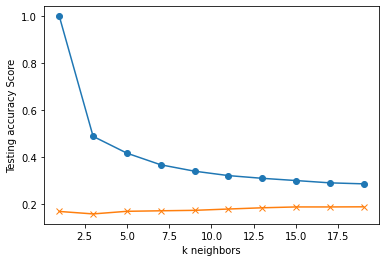

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Now trying with neural networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(14412, 12) (14412,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=9, activation='relu', input_dim=12))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_44 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_45 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_46 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_47 (Dense)             (None, 9)                 90        
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
338/338 - 0s - loss: 1.4095 - accuracy: 0.4769
Epoch 2/10
338/338 - 0s - loss: 1.4074 - accuracy: 0.4757
Epoch 3/10
338/338 - 0s - loss: 1.4065 - accuracy: 0.4729
Epoch 4/10
338/338 - 0s - loss: 1.4063 - accuracy: 0.4746
Epoch 5/10
338/338 - 0s - loss: 1.4049 - accuracy: 0.4776
Epoch 6/10
338/338 - 0s - loss: 1.4059 - accuracy: 0.4754
Epoch 7/10
338/338 - 0s - loss: 1.4048 - accuracy: 0.4776
Epoch 8/10
338/338 - 0s - loss: 1.4039 - accuracy: 0.4781
Epoch 9/10
338/338 - 0s - loss: 1.4027 - accuracy: 0.4760
Epoch 10/10
338/338 - 0s - loss: 1.4030 - accuracy: 0.4778


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

113/113 - 0s - loss: 1.3472 - accuracy: 0.4963
Normal Neural Network - Loss: 1.3471816778182983, Accuracy: 0.4962531328201294


## Now trying it with less features

In [ ]:
# ['danceability',
#                             'energy',
#                             'key',
#                             'loudness',
#                             'mode', 
#                             'speechiness', 
#                             'acousticness', 
#                             'instrumentalness', 
#                             'liveness', 
#                             'valence', 
#                             'tempo', 
#                             'duration_ms'],

dropped_ML_df = ML_df.drop([
                            'key',
                            
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            ],
                           axis=1)

# dropped_ML_df()
# print(dropped_ML_df)
dropped_ML_df.iloc[3:13]

,genre_name,danceability,energy,loudness,valence,tempo,duration_ms
3,classical,0.169,0.01610,-31.034,0.0573,128.143,174267
4,classical,0.184,0.00527,-37.264,0.1510,170.612,315427
5,classical,0.335,0.00532,-31.646,0.0397,65.832,268000
6,classical,0.313,0.02290,-26.350,0.0650,64.387,138125
7,classical,0.444,0.05080,-28.789,0.2710,132.664,147315
8,classical,0.365,0.11600,-27.249,0.1930,126.305,130125
9,classical,0.469,0.01280,-36.856,0.3540,72.765,205867
10,classical,0.433,0.04370,-24.025,0.1960,68.152,126880
11,classical,0.266,0.07500,-21.207,0.1600,90.595,411093
12,classical,0.324,0.10000,-18.178,0.1950,110.153,353000


In [ ]:
X = dropped_ML_df.drop("genre_name", axis=1)
y = dropped_ML_df["genre_name"]
print(X.shape, y.shape)

(14412, 6) (14412,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=9, activation='relu', input_dim=6))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
# model.add(Dense(units=9, activation='sigmoid'))
model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
# model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 9)                 63        
_________________________________________________________________
dense_41 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_42 (Dense)             (None, 9)                 90        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
338/338 - 0s - loss: 2.1553 - accuracy: 0.1632
Epoch 2/10
338/338 - 0s - loss: 2.0350 - accuracy: 0.2197
Epoch 3/10
338/338 - 0s - loss: 1.9035 - accuracy: 0.2774
Epoch 4/10
338/338 - 0s - loss: 1.8390 - accuracy: 0.2910
Epoch 5/10
338/338 - 0s - loss: 1.8017 - accuracy: 0.3028
Epoch 6/10
338/338 - 0s - loss: 1.7782 - accuracy: 0.3124
Epoch 7/10
338/338 - 0s - loss: 1.7626 - accuracy: 0.3164
Epoch 8/10
338/338 - 0s - loss: 1.7502 - accuracy: 0.3188
Epoch 9/10
338/338 - 0s - loss: 1.7408 - accuracy: 0.3268
Epoch 10/10
338/338 - 0s - loss: 1.7341 - accuracy: 0.3301


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

113/113 - 0s - loss: 1.7238 - accuracy: 0.3453
Normal Neural Network - Loss: 1.7237766981124878, Accuracy: 0.3452678322792053


# Genre Dataframe Changed - Grammy Genres (7)

In [3]:
df = pd.read_csv(os.path.join("spotify_df_5.csv"))
df.head()

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,yiruma,river flows in you,64rL48E6xWMIXdpcFDEiB8,https://open.spotify.com/artist/0fauHpmSHwodVY...,https://open.spotify.com/track/64rL48E6xWMIXdp...,classical,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,dragonforce,through the fire and flames,6nnacTL5on2aVsRhVDNUSo,https://open.spotify.com/artist/2pH3wEn4eYlMMI...,https://open.spotify.com/track/6nnacTL5on2aVsR...,classical,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,johann sebastian bach,"cello suite no. 1 in g major, bwv 1007: i. pré...",61dYvvfIRtIDFuqZypPAta,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://open.spotify.com/track/61dYvvfIRtIDFuq...,classical,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,camille saint-saëns,"the carnival of the animals, r. 125: xiii. the...",0jOnZhF75V68VsBObWx2XO,https://open.spotify.com/artist/436sYg6CZhNefQ...,https://open.spotify.com/track/0jOnZhF75V68VsB...,classical,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,ludwig van beethoven,"sonata no. 14 ""moonlight"" in c-sharp minor"", o...",3DNRdudZ2SstnDCVKFdXxG,https://open.spotify.com/artist/2wOqMjp9TyABvt...,https://open.spotify.com/track/3DNRdudZ2SstnDC...,classical,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [4]:
ML_df = df.drop(['artist_name', 'track_name', 'track_id', 'artist_href', 'track_href'], axis=1)
ML_df.iloc[10000,1:13]
ML_df.iloc[10000]

genre_name              pop
danceability          0.744
energy                0.514
key                       6
loudness             -6.103
mode                      1
speechiness          0.0746
acousticness          0.355
instrumentalness          0
liveness              0.184
valence               0.449
tempo               136.013
duration_ms          228816
Name: 10000, dtype: object

In [5]:
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre_name        11267 non-null  object 
 1   danceability      11267 non-null  float64
 2   energy            11267 non-null  float64
 3   key               11267 non-null  int64  
 4   loudness          11267 non-null  float64
 5   mode              11267 non-null  int64  
 6   speechiness       11267 non-null  float64
 7   acousticness      11267 non-null  float64
 8   instrumentalness  11267 non-null  float64
 9   liveness          11267 non-null  float64
 10  valence           11267 non-null  float64
 11  tempo             11267 non-null  float64
 12  duration_ms       11267 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.1+ MB


## Now trying with KNN

In [6]:
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head(100)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.542,0.05360,2,-20.731,1,0.0464,0.99400,0.93500,0.0734,0.2350,116.554,144000
96,0.132,0.01950,0,-29.760,1,0.0445,0.99300,0.88800,0.0569,0.1400,81.616,163267
97,0.248,0.29800,0,-15.661,0,0.0395,0.95700,0.90000,0.0943,0.1570,97.853,442000
98,0.494,0.01600,10,-32.307,1,0.0426,0.99500,0.92200,0.1360,0.1180,98.224,295840


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1826,0.618,0.412,8,-12.075,1,0.0368,0.67500,0.000001,0.0886,0.740,203.933,251960
9735,0.458,0.452,9,-9.299,0,0.0470,0.34200,0.000019,0.0703,0.316,86.318,269680
7378,0.432,0.664,9,-7.281,0,0.0363,0.00296,0.758000,0.1170,0.277,196.083,172437
8415,0.517,0.273,10,-17.279,0,0.0627,0.86600,0.774000,0.9790,0.321,63.423,354573
4405,0.425,0.230,4,-10.844,1,0.0355,0.75700,0.000004,0.3340,0.223,118.826,219906
...,...,...,...,...,...,...,...,...,...,...,...,...
7970,0.589,0.478,9,-7.271,0,0.0241,0.79500,0.922000,0.1100,0.314,93.013,276080
7125,0.834,0.233,7,-13.418,1,0.0596,0.00224,0.729000,0.1200,0.762,86.094,173023
6761,0.691,0.873,5,-8.758,0,0.0382,0.33000,0.000002,0.0362,0.916,93.685,251253
9911,0.727,0.860,3,-2.712,1,0.0641,0.00443,0.000000,0.0718,0.747,133.995,154000


### Baseline Accuracy


In [9]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()

In [10]:
dummy_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [11]:
y_pred = dummy_clf.predict(X_test)
print(y_pred)

['hip hop' 'folk' 'classical' ... 'classical' 'jazz' 'hip hop']


In [12]:
dummy_score = dummy_clf.score(X_test, y_test)
print(dummy_score)

0.14873979410720625


In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


# X_scaler = StandardScaler().fit([[0.765, 0.307, 11, -10.472, 1, 0.0328, 0.727, .00000215,0.109,0.257,119.836, 206109]])
X_scaler = StandardScaler().fit(X_train)
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_test


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11262,0.578,0.4910,11,-8.544,0,0.2100,0.20300,0.000378,0.1820,0.640,98.273,184814
3622,0.548,0.7200,1,-9.777,0,0.0409,0.06860,0.000232,0.1070,0.458,140.966,229093
990,0.495,0.0585,9,-18.941,1,0.0447,0.99400,0.878000,0.1490,0.462,123.884,186000
10202,0.861,0.3300,6,-7.194,1,0.0526,0.62700,0.000002,0.1400,0.718,95.016,216000
8176,0.553,0.6590,9,-9.281,1,0.0613,0.50200,0.859000,0.1840,0.460,183.815,242800
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0.336,0.0900,2,-23.102,0,0.0365,0.98200,0.840000,0.0895,0.118,136.625,845107
8463,0.539,0.6440,5,-7.407,0,0.0399,0.23600,0.775000,0.1140,0.781,78.311,224267
1807,0.608,0.7680,1,-9.911,1,0.0364,0.10100,0.000001,0.0942,0.748,132.699,211160
5630,0.857,0.9380,11,-8.278,0,0.3520,0.10800,0.000000,0.5740,0.644,88.040,186267


In [ ]:

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled[11]

array([ 0.98375516,  0.68522381, -1.49539308,  1.1605679 ,  0.66259543,
        0.29159104, -0.96101184, -0.47258894, -0.65325508,  1.95854714,
       -1.33556458,  0.33741828])

k: 1, Train/Test Score: 1.000/0.222, 1.222
k: 3, Train/Test Score: 0.531/0.213, 0.743
k: 5, Train/Test Score: 0.465/0.214, 0.679
k: 7, Train/Test Score: 0.418/0.234, 0.652
k: 9, Train/Test Score: 0.395/0.238, 0.633
k: 11, Train/Test Score: 0.383/0.241, 0.624
k: 13, Train/Test Score: 0.371/0.239, 0.610
k: 15, Train/Test Score: 0.360/0.241, 0.601
k: 17, Train/Test Score: 0.350/0.247, 0.596
k: 19, Train/Test Score: 0.343/0.244, 0.587
k: 21, Train/Test Score: 0.338/0.248, 0.586
k: 23, Train/Test Score: 0.338/0.248, 0.586
k: 25, Train/Test Score: 0.337/0.242, 0.579
k: 27, Train/Test Score: 0.335/0.246, 0.581
k: 29, Train/Test Score: 0.336/0.241, 0.576


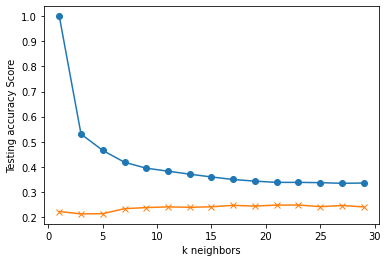

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.533


In [ ]:
snew_data = 0.2, 0.2, 10, -30, 1, 0.05, 0.8, 0.8, 0.5, 0.2, 0.1, 222222
# new_data = new_data.transform(new_data)

# [0.765, 0.307, 11, -10.472, 1, 0.0328, 0.727, .00000215,0.109,0.257,119.836]

In [ ]:

new_data = [[0.765, 0.307, 11, -10.472, 1, 0.0328, 0.727, .00000215,0.109,0.257,119.836, 206109]]
new_data_1 = [[0.111, 0.777, 2, -2, 0, 0.0111, 0.111, .00111, 0.9, 0.9, 50, 333333]]
new_data_2 = [[0.2, 0.2, 10, -30, 1, 0.05, 0.8, 0.8, 0.5, 0.2, 0.1, 222222]]
new_data_3 = [[0.79317033,0.91557169,1.06375534,0.73925307,0.67278438,2.26520775,-1.03279864,-0.48199241,-0.35157953,-1.57235678,-0.91074136,-0.63348198]]
new_data_4 = [[-1.14087944,1.24642326,1.06375534,0.41127868,0.67278438,-0.47284276,-1.07621207,1.42227523,0.16892679,-0.22550447,-0.98815799,0.81730637]]
new_data_5 = [[0.446,0.239,0,-13.945,1,0.0316,0.5510,0.000004,0.0697,0.298,189.507,336453]]
predicted_class = knn.predict(X_test_scaled)
print(predicted_class)

['hip hop' 'folk' 'classical' ... 'country' 'hip hop' 'rock']


In [ ]:
import pickle
# save the model to disk
filename = 'audio_features_model.csv'
pickle.dump(knn, open(filename, 'wb')) 

# save scalar
pickle.dump(X_scaler, open("scaler.pickle", "wb"))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

0.5328363507277245


## Now trying with neural networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(11267, 12) (11267,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y)

In [ ]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9083,0.646,0.770,2,-6.596,0,0.2260,0.00249,0.000000,0.0715,0.681,99.165,236133
5907,0.793,0.676,4,-6.928,1,0.2290,0.07160,0.017400,0.0594,0.898,97.383,285640
3115,0.515,0.587,4,-7.136,1,0.0383,0.00662,0.000000,0.1400,0.361,148.044,195667
6116,0.836,0.916,1,-3.038,0,0.2220,0.14300,0.000000,0.3120,0.614,99.879,272706
570,0.488,0.289,9,-24.205,0,0.0349,0.95700,0.868000,0.1330,0.785,113.594,174973
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,0.729,0.688,3,-7.468,1,0.0264,0.12700,0.000009,0.2950,0.671,123.867,219600
9657,0.731,0.794,0,-5.126,0,0.0522,0.03230,0.000026,0.1120,0.356,139.994,220454
1853,0.581,0.624,9,-8.346,1,0.0777,0.09870,0.000000,0.0411,0.637,139.714,151293
1675,0.677,0.776,5,-5.933,1,0.0386,0.42000,0.000689,0.0954,0.642,121.834,192800


In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12))
# model.add(Dense(units=7, activation='sigmoid'))
# model.add(Dense(units=7, activation='sigmoid'))
# model.add(Dense(units=, activation='sigmoid'))
model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
# model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
265/265 - 0s - loss: 1.1173 - accuracy: 0.5746
Epoch 2/10
265/265 - 0s - loss: 1.1167 - accuracy: 0.5751
Epoch 3/10
265/265 - 0s - loss: 1.1159 - accuracy: 0.5709
Epoch 4/10
265/265 - 0s - loss: 1.1161 - accuracy: 0.5735
Epoch 5/10
265/265 - 0s - loss: 1.1171 - accuracy: 0.5742
Epoch 6/10
265/265 - 0s - loss: 1.1157 - accuracy: 0.5733
Epoch 7/10
265/265 - 0s - loss: 1.1160 - accuracy: 0.5750
Epoch 8/10
265/265 - 0s - loss: 1.1165 - accuracy: 0.5730
Epoch 9/10
265/265 - 0s - loss: 1.1149 - accuracy: 0.5759
Epoch 10/10
265/265 - 0s - loss: 1.1143 - accuracy: 0.5724


In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

89/89 - 0s - loss: 1.1216 - accuracy: 0.5694
Normal Neural Network - Loss: 1.1215656995773315, Accuracy: 0.5694000720977783


In [ ]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['hip hop' 'country' 'country' 'country' 'folk']
Actual Labels: ['hip hop', 'country', 'country', 'pop', 'jazz']


In [ ]:
model.save("audio_features_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("audio_features_model.h5")

## Now trying with logistic regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Assign X (data) and y (target)
X = ML_df.drop("genre_name", axis=1)
y = ML_df["genre_name"]
print(X.shape, y.shape)

(11267, 12) (11267,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.21597633136094674
Testing Data Score: 0.21902733404330849


In [ ]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['country' 'jazz' 'jazz' 'country' 'jazz' 'jazz' 'country' 'country'
 'country' 'jazz']
First 10 Actual labels: ['country', 'jazz', 'jazz', 'pop', 'jazz', 'country', 'classical', 'folk', 'rock', 'jazz']


In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,country,country
1,jazz,jazz
2,jazz,jazz
3,country,pop
4,jazz,jazz
...,...,...
2812,jazz,hip hop
2813,jazz,jazz
2814,country,hip hop
2815,jazz,jazz


## Now trying with multiple linear models

In [ ]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
ML_df = pd.get_dummies(ML_df)
ML_df.head()
### END SOLUTION

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_name_classical,genre_name_country,genre_name_folk,genre_name_hip hop,genre_name_jazz,genre_name_pop,genre_name_rock
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787,1,0,0,0,0,0,0
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560,1,0,0,0,0,0,0
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480,1,0,0,0,0,0,0
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267,1,0,0,0,0,0,0
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427,1,0,0,0,0,0,0


In [ ]:
X = ML_df[['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'mode', 
                            'speechiness', 
                            'acousticness', 
                            'instrumentalness', 
                            'liveness', 
                            'valence', 
                            'tempo', 
                            'duration_ms']]
y = y = ML_df['genre_name_rock'].values.reshape(-1, 1)
print(X.shape, y.shape)

(11267, 12) (11267, 1)


In [ ]:
# Drop extra dummy columns

# ['genre_name_classical',
#  'genre_name_country',
#  'genre_name_folk', 
#  'genre_name_hip hop', 
#  'genre_name_jazz', 
#  'genre_name_pop', 
#  'genre_name_rock']

### BEGIN SOLUTION
ML_df = ML_df.drop(columns=['genre_name_classical',
                            'genre_name_country', 
                            'genre_name_folk', 
                            'genre_name_hip hop', 
                            'genre_name_jazz', 
                            'genre_name_pop'])
ML_df.head()
### END SOLUTION

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_name_rock
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787,0
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560,0
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480,0
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267,0
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427,0


In [ ]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [ ]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

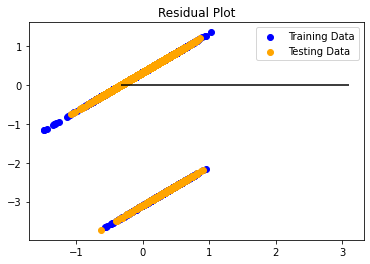

In [ ]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.8582189479975649, R2: 0.10189393737605335


In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8592679449771139, R2: 0.10106519149971394


In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8584757590791389, R2: 0.10189394751540791


In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8582189479975649, R2: 0.10216261390961578


## Now trying with SVM

In [ ]:
target = ML_df["genre_name"]

In [ ]:
ML_df = ML_df.drop("genre_name", axis=1)
feature_names = ML_df.columns
ML_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ML_df, target)

In [ ]:
# taking forever to run

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

## Now trying with KNN Regression Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
y = ML_df["genre_name"]
X = ML_df.drop("genre_name", axis=1)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [ ]:
from sklearn.model_selection import train_test_split
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:

from sklearn.model_selection import train_test_split
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    all_score = train_score + test_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, {all_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

TypeError: ignored

In [ ]:
print(reg.score(reg.score(X_test, y_test)))

TypeError: ignored